# Assignment 6
## Preliminaries

In [1]:
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt 
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import scipy.optimize as so

In [5]:
df1 = pd.read_csv('possum.csv')
df1.head()

,sex,age,headL,skullW,totalL,tailL
0,m,8,94.1,60.4,89.0,36.0
1,f,6,92.5,57.6,91.5,36.5
2,f,6,94.0,60.0,95.5,39.0
3,f,6,93.2,57.1,92.0,38.0
4,f,2,91.5,56.3,85.5,36.0


## Task 1: Robust regression ( / 20 pts)
### Question 1 ( / 13 pts)
Modify the function simpleRegLossRSS to calculate the summed absolute deviation of the prediction from the data (instead of the residual sum-of-squares). Call this new function simpleRegLossSAD. Modify your simpleRegFit function to take a flexible loss function as a 3rd input argument. Now call the function with your new loss function to calculate a regression line of tailL (y) against age (x) in the possum data set. Your function simpleRegFit should provide a plot of the fit. Compare the fit with the fit you achieved with the squared error. What do you observe?

In [77]:
#Need these previous function for working functions
def simpleRegPredict(b, x):
    y_hat = b[0] + b[1]*x
    return y_hat

def plotPrediction(b, x, y, fcn = simpleRegPredict):
    #Getting scatter set up
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.scatter(x, y)
    plt.xlabel('x variable')
    plt.ylabel('y variable')
    
    xp = np.linspace(min(x), max(x), num = 50)
    yp = fcn(b, xp)
    ax.plot(xp, yp, 'r')
    
def simpleRegLossRSS(b, x, y):
    predY = simpleRegPredict(b, x)
    res = y-predY
    rss = sum(res**2)
    
    gradient = np.zeros(2)
    gradient[0] = -2*sum(res)
    gradient[1] = -2*sum(res*x)
    return (rss, gradient)

#Modified simpleRegLossRSS
def simpleRegLossSAD(b, x, y):
    predY = simpleRegPredict(b, x)
    res = y-predY
    sad = sum(np.abs(res))
    
    gradient = np.zeros(2)
    gradient[0] = -sum(np.sign(res))
    gradient[1] = -sum(np.sign(res)*x)
    return (sad, gradient)

#Modified simpleRegFit
def simpleRegFit(x, y, func = simpleRegLossSAD):
    result = so.minimize(func, (0,0), args = (x, y), jac = True)
    bOp = result.x
    plotPrediction(bOp, x, y)
    TSS = sum((y - np.mean(y))**2)
    RSS, b = simpleRegLossRSS(bOp, x, y)
    R2 = 1 - (RSS/TSS)
    return R2

The R2 value is: 0.12937096211204158


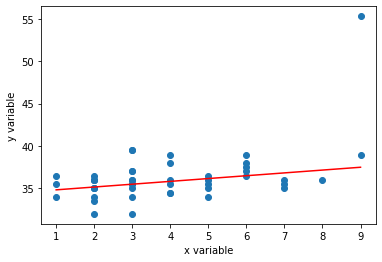

In [78]:
#Calling the function
r2_value = simpleRegFit(df1['age'].values, df1['tailL'].values)
print(f'The R2 value is: {r2_value}')

Figure 1: Scatter plot using the summed absolute deviation to fit the linear model

Written Answer: Compared to the previous fit using the squared error, the fit using the summed absolute deviation is much closer to the majority of the data and appears to not take as much influence from the outlier in the top right of the scatter plot

### Question 2 ( / 7 pts)
Report the R2 for the fit using median regression (question 1). Compare it to the R2 value you got for the fit minimizing the squared error. Which one is lower? Why? Which fit is the better one? Which one will predict new data better?  

The R2 value using median regression is ~0.129 compared to the previous R2 using the fit with squared error of ~0.161.  As we can see the new R2 value is slightly lower than the previous which means that the fit using the squared error was better for this data only slightly.  However, the fit of the median regression appears much better as it doesn't take into account the outlier and it will also predict future data better than the squared error will due to this.

## Task 2: Nonlinear (polynomial) regression ( / 40 pts)
For this task, we will use a new data set (fertilizer.csv), which comes from an agricultural study. Each plot of the field (a 10m-by-10m square) was given a randomly determined concentration of fertilizer (in ml/week/m2). The harvest yield for grain in kg/patch was recorded. 
The data has two fields 
- fertCon: Concentration of fertilizer
- harvest: Yield of the harvest in kg


### Question 1 ( / 5 pts)
Load the data set and make a scatter plot of fertilizer concentration on the x-axis and harvest yield on the y-axis. How would you describe the relationship? 

In [8]:
df2 = pd.read_csv('fertilizer.csv')
df2.head()

,Unnamed: 0,fertCon,harvest
0,0,0.488398,1.146285
1,1,2.994977,3.977302
2,2,3.475281,5.843234
3,3,0.818346,1.384137
4,4,3.786342,5.036091


### Question 2 ( / 12 pts)
Write a function called polyRegPredict(b,x) which returns the prediction of a polynomial regression model on x. The length of b should indicate the order of the model. If b has length 1, the model should be of order 0 (constant). If b has length 2, it should be a linear regression model, if b has length 3, it should be quadratic model (order 2). Call your function with x=np.linspace(-5,5,10) and b=[-10,-4,1]. Plot the result as a scatter plot.

<AxesSubplot:>

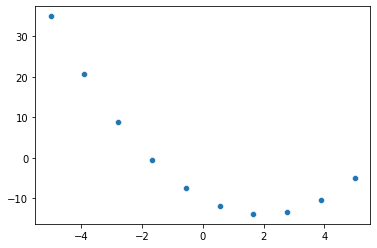

In [42]:
def polyRegPredict(b, x):
    y_hat = np.zeros(x.shape)
    for i in range(len(b)):
        y_hat += b[i] * (x**i)
    
    return y_hat

#Function testing
x = np.linspace(-5, 5, 10)
b = [-10, -4, 1]
yPred = polyRegPredict(b, x)

#Scatter plot of result
sns.scatterplot(x = x, y = yPred)

Figure 2: Scatter plot of the polyRegPredict values

### Question 3 ( / 18 pts)
Modify you function simpleRegLossRSS to become function polyRegLossRSS, which calculates the residual sum of squares and the derivatives for the polyinomial regression. Also change your function plotPrediction to use polyRegPredict, instead of modelPredict. Then modify your simpleRegFit function to become polyRegFit(x,y,order), which takes the order of the polynomial fit as a third input argument. Call the function for a quadratic fit the harvest yield (y) as a function of fertilizer concentration (x).

The R2 value is: 0.8610188872702469


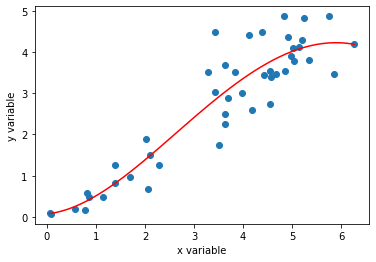

In [53]:
def polyPlotPrediction(b, x, y, fcn = polyRegPredict):
    #Getting scatter set up
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.scatter(x, y)
    plt.xlabel('x variable')
    plt.ylabel('y variable')
    
    xp = np.linspace(min(x), max(x), num = 50)
    yp = fcn(b, xp)
    ax.plot(xp, yp, 'r')
    
def polyRegFit(x, y, order):
    b = np.zeros((order + 1, 1))
    result = so.minimize(polyRegLossRSS, b, args = (x, y), jac = True)
    bOp = result.x
    polyPlotPrediction(bOp, x, y)
    TSS = sum((y - np.mean(y))**2)
    RSS = result.fun
    R2 = 1 - (RSS/TSS)
    return (R2, bOp)

def polyRegLossRSS(b, x, y):
    predY = polyRegPredict(b, x)
    res = y-predY
    rss = sum(res**2)
    
    gradient = np.zeros(len(b))
    for i in range(len(b)):
        gradient[i] = -2 * np.sum((x**i) * res)
    
    return (rss, gradient)

#Function testing
polyR2, bOp = polyRegFit(df2['harvest'].values, df2['fertCon'].values, 4)
print(f'The R2 value is: {polyR2}')

Figure 3: Scatter plot with a poly regression line of fit for the fertilizer dataset

### Question 4 ( / 5 pts)
Call you polyRegression function to produce a polynomial fit of order 8. What is the R2? 

The r2 value is: 0.8686722464049424


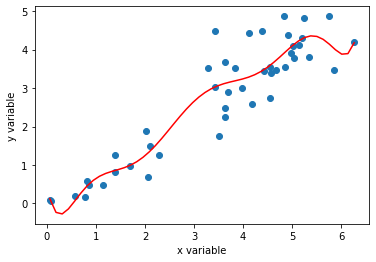

In [48]:
newPolyR2, bOp2 = polyRegFit(df2['harvest'].values, df2['fertCon'].values, 8)
print(f'The r2 value is: {newPolyR2}')

Figure 4: Scatter plot with a poly regression line of fit for the fertilizer dataset

## Task 3: Cross-validation of models ( / 40 pts)
### Question 1 ( / 20 pts)
Write a function leaveOneOutCV, which takes as inputs x and y, a function to be called for the fit, optional input arguments for the fit, and a function to be called for prediction. The function should then perform leave-on-out crossvalidation and calculate the cross-validated R2. It should then fit the model to all data and calculate the fitted R2. The sketch of the function can be found in the lecture. Call the function to get a cross-validated R2 for a polynomial fit of order 8. How much lower is the crossvalidated R2 than the fitted R2? 

In [99]:
#Same as the other polyRegFit but without the plotting for simplicity
def polyRegFit2(x, y, order):
    b = np.zeros((order + 1, 1))
    result = so.minimize(polyRegLossRSS, b, args = (x, y), jac = True)
    bOp = result.x
    TSS = sum((y - np.mean(y))**2)
    RSS = result.fun
    R2 = 1 - (RSS/TSS)
    return (R2, bOp)

def leaveOneOutCV(x, y, fcn = polyRegFit2, args = (), predfcn = polyRegPredict):
    idx = np.arange(len(y))
    k = len(y)
    folds = np.array_split(idx, k)
    yp = []
    for i in range(k):
        folds_copy = folds.copy()
        testIdx = folds_copy[0]
        testX = x[testIdx]
        del folds_copy[0]
        trainIdx = np.concatenate(folds_copy)
        xT = x[trainIdx]
        yT = y[trainIdx]
        RSS_t, b_t = fcn(xT, yT, args)
        ypTest = predfcn(b_t, xT)
        yp.append(ypTest)
    
    ypCV = np.concatenate(yp)
    TSS = sum((y - np.mean(y))**2)
    res = ypCV - y #This line is generating the error due to the differing sizes of the two variables
    RSScv = sum(res**2)
    RSS, bOp = polyRegFit2(df2['harvest'].values, df2['fertCon'].values, args)
    R2cv = 1 - (RSScv/TSS)
    R2 = 1 - (RSS/TSS)
    return R2cv, R2

#Function testing
crossR2, R2 = leaveOneOutCV(df2['harvest'].values, df2['fertCon'].values, args = (8))
print(f'The R2cv value is: {crossR2}, and the R2 value is: {R2}')

ValueError: number sections must be larger than 0.

Written Answer: The cross validated R2 is ... compared to the normal R2. of ....

### Question 2 ( / 20 pts)
Run a loop from model order 0 (constant) to model order 8. For each polynomial model order, call you function leaveOneOutCV to get the crossvalidated R2 and the normal R2 for each model order. Make a plot where you show the line for the crossvalidated R2 and R2 as a function of model order. When is the best crossvalidated R2 reached? When does the model start overfitting? Which model would you use to make a prediction for an unobserved data point? 

In [ ]:
for order in range(8):
    cR2, R2 = leaveOneOutCV(df2['harvest'].values, df2['fertCon'].values, args = (order))
    #If the leaveOneOutCV was not generating the error it would be able to create the plot showing both the cross validation fit and the normal fit

Written Answer: The best cross validated R2 value is obtained at order ..., and the model begins to overfit at around ....  The model I would use to make a prediction for unobserved data points would be model ....